> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

>‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
> what is the number of male and female that didn't show ?
> does age is considerd as parmetrs for people didn't show up ?
> What is the number of Males thut suffer from Hipertenstion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


 the Shape of the data frame 

In [3]:
df.shape

(110527, 14)

statictical description about data frame 

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


from this describtion we could see that Average of Age is about 37 , one of the main thing about this data that there is a min value of age is -1 and that is not possible 

now we need to collect more information about this data frame 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


we could see from here that the no.of entires for the columns are identical we could see from this table that Apointed day is signed as object and in the data cleaning we should change it to be datastamp type 

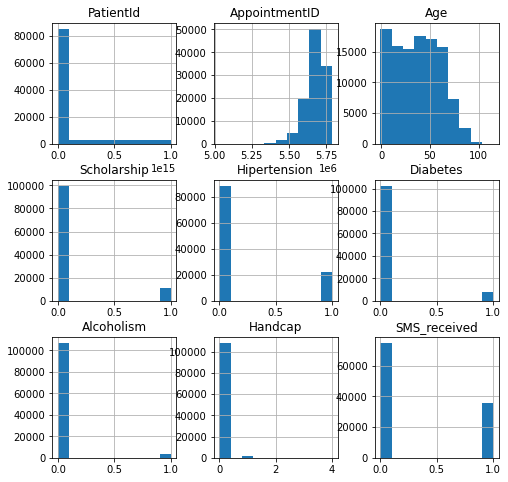

In [6]:
df.hist(figsize= (8 , 8 ));


### Data Cleaning (Replace this with more specific notes!)
> Data cleaning process involve :
    1- removing unnecssary coluomn  
    2- remove dublication : 
    3- remove null variables : and we will not do that as a lot of cell contain zero value to indicate something  

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(["PatientId","AppointmentID","ScheduledDay","Neighbourhood"], axis =1 , inplace = True)

In [8]:
df.head()

,Gender,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


In [9]:
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 2   Age             110527 non-null  int64              
 3   Scholarship     110527 non-null  int64              
 4   Hipertension    110527 non-null  int64              
 5   Diabetes        110527 non-null  int64              
 6   Alcoholism      110527 non-null  int64              
 7   Handcap         110527 non-null  int64              
 8   SMS_received    110527 non-null  int64              
 9   No-show         110527 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(7), object(2)
memory usage: 8.4+ MB


In [11]:
sum(df.duplicated())

77624

In [12]:
df.drop_duplicates()

,Gender,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No
1,M,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,No
2,F,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,No
3,F,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,No
4,F,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110468,F,2016-06-07 00:00:00+00:00,76,0,1,1,0,0,1,No
110477,F,2016-06-06 00:00:00+00:00,67,0,0,1,0,0,1,No
110488,M,2016-06-01 00:00:00+00:00,76,0,0,0,0,0,0,No
110492,M,2016-06-08 00:00:00+00:00,33,0,1,0,0,0,0,Yes


In [13]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


we could see from the table and graph that the average age is about 37 but there is wrong value of data needed to removed which is age = -1 and it is not possible also the sam as max value = 115 

In [14]:
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]
df['Age'].value_counts()


0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
96       17
97       11
98        6
100       4
99        1
Name: Age, Length: 101, dtype: int64

In [15]:
df['Age'].describe()

count    110519.000000
mean         37.084519
std          23.103165
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         100.000000
Name: Age, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### what is the number of male and female that didn't show?

to answer this question we have now 1st the total number of the particpent depending on thier gender m

In [16]:
No_G=df.Gender.value_counts()
No_G

F    71832
M    38687
Name: Gender, dtype: int64

In [17]:
No_F = No_G[0]
No_F 

71832

In [18]:
No_M = No_G[1]
No_M

38687

from here we could plot a pi chart to visualize the percentage of Female to Male 

<AxesSubplot:ylabel='Gender'>

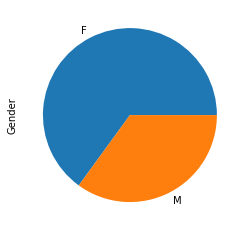

In [19]:
df["Gender"].value_counts().plot(kind = 'pie')

now we are going to perform a filtration process for by the gender to see what are the number of Female and that didnt show up and the same thing with the Male that didn't show up 

In [20]:
df_FS = df.loc[(df['Gender'] == 'F') & (df['No-show'] == 'No')]

In [21]:
no_f_ds = df_FS.Gender.value_counts()
fds= no_f_ds.item()
fds

57241

In [22]:
df_mS = df.loc[(df['Gender'] == 'M') & (df['No-show'] == 'No')]

In [23]:
no_m_ds = df_mS.Gender.value_counts()
mds= no_m_ds.item()
mds

30962

Text(0, 0.5, "No of gender didn't show")

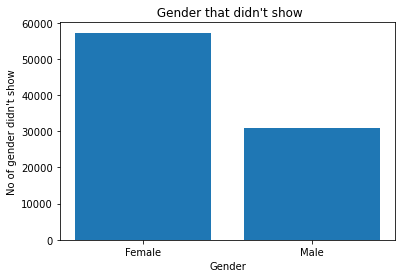

In [24]:
plt.bar(["Female" ,"Male"],[fds , mds])
plt.title(" Gender that didn't show")
plt.xlabel("Gender")
plt.ylabel("No of gender didn't show")

the percent of female and male didnt show up

In [25]:
percente_FNS = (fds/No_F)*100
percente_FNS 

79.68732598284886

In [26]:
percente_MNS = (mds/No_M)*100
percente_MNS 

80.03205211052808

we could see from this graph that te number of women that didn't show up is larger than the Male 

### Does age is considerd as parmetrs for people didn't show up  ?

1st we need to know the range of ages for the overall pations 

In [27]:
df.head()

,Gender,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No
1,M,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,No
2,F,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,No
3,F,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,No
4,F,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,No


Then we construt two data frames with filtration for both pationt that did'n show how showed with respect to age 

In [28]:
df_ns = df.loc[df['No-show'] == 'No']
df_n = df.loc[df['No-show'] == 'Yes']

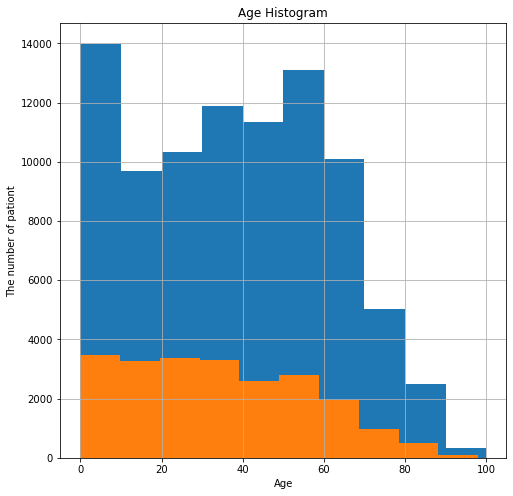

In [29]:
df_ns['Age'].hist(figsize = [8,8])
df_n['Age'].hist(figsize = [8,8])
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel("The number of pationt");

the average of patient that didn't show upis about 38 years 

In [30]:
df_ns.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,88203.000000,88203.000000,88203.000000,88203.000000,88203.000000,88203.000000,88203.000000
mean,37.787297,0.093908,0.204392,0.073841,0.030418,0.022732,0.291339
std,23.334275,0.291703,0.403259,0.261513,0.171737,0.162721,0.454382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [31]:
df.head()

,Gender,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No
1,M,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,No
2,F,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,No
3,F,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,No
4,F,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,No


### What is the number of Males and females that suffer from Hipertenstion ? 

we are going to creat a column that hold the value of 1 that is going to used for counting 

In [32]:
df['count'] = 1
df.head()

,Gender,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,count
0,F,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No,1
1,M,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,No,1
2,F,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,No,1
3,F,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,No,1
4,F,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,No,1


Then we are going to filter the columns by grouping Gender and hiptertention and the paratmer of group is to count the number of people have hipertention or not depending on thier gender 

In [33]:
df_h = df.groupby(['Gender','Hipertension']).count()['count']
df_h

Gender  Hipertension
F       0               56494
        1               15338
M       0               32225
        1                6462
Name: count, dtype: int64

In [34]:
print("The number of female and Male that are hipertenstion is equal {} , {} respectivlely ".format(df_h[0], df_h[3]))

The number of female and Male that are hipertenstion is equal 56494 , 6462 respectivlely 


<a id='conclusions'></a>
## Conclusions
> we could conclude that about 80 percent of the patient didn' show up 
> The average of pationt that did'nt show up is about 38 years .
> The number of pationt that suffer from Hipertion is female is larger than male.
> 


Data is not enough for the anaylsis , I think more data should be colected like : 
        1- appointment time : which will help to figure our what is time that will be ok for the patient 
        
        2- location: does it very accessable for the patient to come to. 
        
        3- insurance information 
        
        4- wather statues 
        
        5- blood pressure
        
        6- Avilability for wokring doctor
        
In my opinion those features need to be add among the data base
    
## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1